### Introduction

Principal Component Analysis (PCA) is an unsupervised machine learning algorithm \
that reduces the dimension(s) of the dataset i.e. it reduces the number features \
while preserving the information as much as possible. This reduction can be any dimension \
such that $1 \leq d \leq D$ where d is the number of dimensions to reduce from a dataset of D dimension.


### Pre-processing

We need to make sure we standardize data by doing the following
$$\mu_{j} := \frac{1}{n}\sum_{i}^{n} x_{j}^{(i)}$$
$$ \sigma*{j} = \sqrt{\frac{1}{n} \sum*{i}^{n}\left(x*{j}^{(i)} - \mu*{j}\right)^{2}}$$
$$x*{j}^{(i)} := \frac{x*{j}^{(i)} - \mu*{j}}{\sigma*{j}}$$

After we pre processed the data where every single data is spread out properly, we need to make sure that \
we pick a line (unit vector u) such that we get the maximum variance (spread out as much as possible) so that $x^{(i)}$ \
can be projected orthogonally while preserving data's variance as much as possible. \
To rephrase this question better, what we're trying to do is project $x^{(i)}$ onto $u$ to get length of $u^{T}x^{(i)}$
$$ \max*{u\text{: } ||u|| = 1} \frac{1}{n}\sum*{i}^{n}\left(u^{T}x^{(i)}\right)^{2} $$

The reasoning behind the length of $x^{(i)}$ projected onto u being $u^{T}x^{(i)}$ is shown here:
![alt text](<projecting a vector.png>)


### Solving the optimization problem

$$ \max*{u\text{: } ||u|| = 1} \frac{1}{n}\sum*{i}^{n}\left(u^{T}x^{(i)}\right)^{2}$$
Expanding this, we get
$$ \max*{u\text{: } ||u|| = 1} \frac{1}{n}\sum*{i}^{n} u^{T}x^{(i)}u^{T}x^{(i)}$$
Rearranging it to factor $u^{T}$
$$ \max*{u\text{: } ||u|| = 1} u^{T} \frac{1}{n}\sum*{i}^{n} x^{(i)}u^{T}x^{(i)}$$
Rearranging it, we get the covariance matrix isolated
$$ \max*{u\text{: } ||u|| = 1} u^{T} \frac{1}{n}\sum*{i}^{n} x^{(i)}x^{(i)^{T}}u$$
Let $C$ be the covariance matrix $C =  \frac{1}{n}\sum_{i}^{n} x^{(i)}x^{(i)^{T}}$ $\left(\text{remember that we subtracted the mean from } x^{(i)}\right)$
$$ \max\_{u\text{: } ||u|| = 1} u^{T}Cu$$

Since we have a constraint of $||u|| = 1 \implies u^{T}u = 1 \implies 1 - u^{T}u = 0$, we can use lagrange multiplier \
to solve the optimization problem in one equation. \
Let the objective function be $f(u) = u^{T}Cu$  
Let the constraint function be $g(u) = 1 - u^{T}u$
$$\nabla f(u) = \lambda \nabla g(u)$$
$$\nabla f(u) - \lambda \nabla g(u) = 0$$
Covariance matrix is symmetric by definition $Cov(x_{ij}, x_{ji}) = Cov(x_{ji}, x_{ij}) \implies x_{ij} = x_{ji}$ \
Expanding the matrix operations, we get
$$u^{T}Cu = \sum_{i=1}^{n}\sum_{j=1}^{n} u_{i}c_{ij}u_{j}$$
Something to keep in mind when taking the derviative

$$
\frac{\partial}{\partial{u_{i}}} \sum_{i=1}^{n}\sum_{j=1}^{n} u_{i}c_{ij}u_{j} = \begin{cases}
  c_{ij}u_{j} + c_{ji}u_{j}  & i \neq j \\
  2c_{ij}u_{i} & i = j
\end{cases}
$$

Since A is a symmetric matrix then $c_{ij} = c_{ji}$ when $i \neq j$ \
Giving us

$$
\frac{\partial}{\partial{x_{i}}} \sum_{i=1}^{n}\sum_{j=1}^{n} x_{i}c_{ij}x_{j} =
  2c_{ij}x_{i}
$$

$$\therefore \nabla f(u) = 2Cu$$
To compute $\nabla g(u)$, we expand the vector operations, we get
$$(1 - u^{T}u) = 1 - \sum_{i=1}^{n} u_{i}^{2}$$
$$\nabla 1 - \sum_{i=1}^{n} u_{i}^{2} = \sum_{i=1}^{n} 2 u_{i} = 2u$$
$$\therefore \nabla g(u) = 2u \implies \nabla \lambda g(u) = 2\lambda u$$
Plugging this equation $\nabla f(u) - \lambda \nabla g(u) = 0$, we get
$$2Cu - 2\lambda u = 0 \implies Cu = \lambda u$$
$$u^{T}Cu = \lambda u^{T} u \implies u^{T}Cu = \lambda$$
The maximum u vector will be the vector that yields the largest \
eigenvector of C which would the first principal component ($u_{1}$) and arranged from highest to least respectively as \
their principal components which are also orthogonal to one another $\left(u_{1} \perp u_{2}\perp u_{3} \ldots \perp u_{n} \right)$


### Graphing the PCA

After finding the principal components, Y will be the output to graph corresponding standardized X dataset
$$Y = XW$$
where W is the projection matrix $[u_1, u_2, u_3, \ldots, u_d]$ \
Y is the transformed data matrix where each row corresponds to a data point in the reduced-dimensional space spanned by the principal components $u_1, u_2, u_3, \ldots, u_d$


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [327]:
import numpy as np
import matplotlib.pyplot as plt
class PCA:
  def __init__(self, n_components=3):
    self.n_components = n_components    
  def fit(self, X: np.ndarray):
    eigenvalues, eigenvectors = np.linalg.eig(np.cov(X, rowvar=False))
    self.eigenvalues = eigenvalues 
    self.eigenvectors = eigenvectors[:, :eigenvalues.shape[0]]
  def transform(self, X: np.ndarray):
    print(self.eigenvalues.argsort()[::-1][:self.n_components])
    W = self.eigenvectors[:, self.eigenvalues.argsort()[::-1][:self.n_components]]
    self.W = W
    print(X.shape, self.W.shape)
    return (X @ W)
model = PCA(2)
model.fit(X_scaled)
X_pca = model.transform(X_scaled)
print(model.W.T, model.eigenvalues[model.eigenvalues.argsort()[::-1][:model.n_components]] / np.sum(model.eigenvalues[model.eigenvalues.argsort()[::-1][:model.n_components]]))

[0 1]
(150, 4) (4, 2)
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]] [0.76150718 0.23849282]


In [325]:
from sklearn.decomposition import PCA as pca
model = pca(n_components=2, svd_solver='full')
model.fit(X)
X_pca = model.transform(X)
model.components_, model.explained_variance_ratio_

(array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]),
 array([0.92461872, 0.05306648]))

C:\Users\wahee\AppData\Local\Temp\ipykernel_19844\3238891680.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', edgecolor='k', s=50)


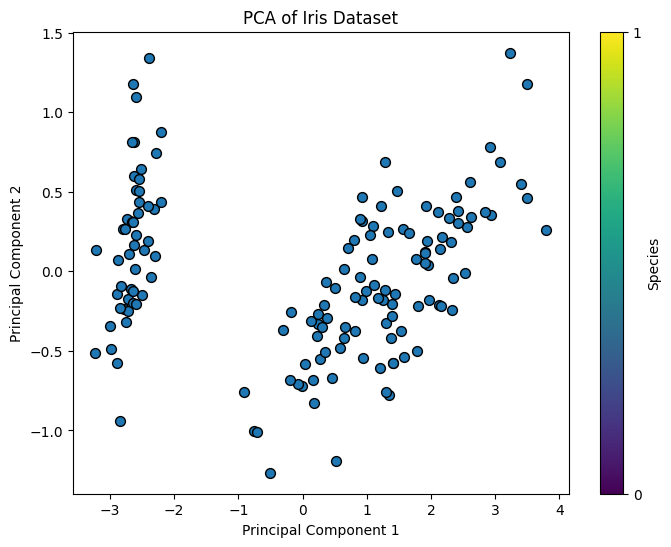

In [317]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species', ticks=range(3), orientation='vertical')
plt.show()